# <center>Lending Club<br />2018 Loan Datasets<br />Data Story Telling</center>

**LendingClub** (LC) is an online credit marketplace that enables a borrower to apply for a loan and an investor to select a loan to invest. When a borrower applies for a loan at LendingClub, the company will screen the applicant. If the loan application gets approved, LendingClub will provide the borrower the interest rate for the loan. Once the borrower accepts the loan, the loan is made available for the investors to select. The investor may choose to invest in a whole loan or a fractional part of a loan. 

The purpose of this project is to study the descriptive statistics of the 2018 loan data collected on LendingClub website to provide the company’s prospective investors a thorough insight into the market. This project aims at providing the answer to the following questions:
- **What are the characteristics of fully paid vs. default loans?**

The project first conducts a time series analysis of the issued loans in 2018, then takes a look at frequency distribution of each loan status flag and finally studies the location of the features in the dataset. The loan status flag categorizes loan status into two categories:
- **Fully paid** loans include loans that had been paid off.
- **Default** loans include loans that had been defaulted or charged off.


The data used for this project is a pickle file produced by the data wrangling program. The python notebook for data wrangling program can be found [here](https://github.com/nphan20181/Loan-Default-Prediction/blob/master/loan_data_wrangling.ipynb).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import modules.global_vars as gv             # load user-defined variables
import modules.global_plot_functions as gp   # load user-defined plot functions

pd.set_option('display.max_columns', 150)
sns.set()

In [2]:
df = pd.read_pickle('out/2018_LC_Loans_Cleaned.pkl')  # load cleaned loan data
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status_flag,earliest_cr_line_year,earliest_cr_line_month,yrs_since_earliest_cr_line,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d_month
0,3000.0,3000.0,36 months,0.0734,93.10,A,A4,9 years,RENT,52000.0,Source Verified,Mar-2018,Fully Paid,n,Major purchase,WA,0.58,0.0,Jan-1998,0.0,7.0,0.0,141.0,0.005,30.0,w,0.0,0.0,3011.577285,3011.58,3000.0,11.58,0.0,0.0,0.0,May-2018,614.03,Nov-2018,0.0,1.0,Individual,0.0,0.0,150592.0,0.0,0.0,1.0,2.0,7.0,0.0,74.0,0.0,1.0,141.0,1.0,31000.0,1.0,2.0,2.0,3.0,25099.0,30359.0,0.5,0.0,0.0,132.0,242.0,18.0,7.0,4.0,18.0,7.0,0.0,1.0,1.0,4.0,15.0,7.0,6.0,19.0,1.0,7.0,0.0,0.0,0.0,1.0,96.7,0.0,0.0,0.0,191216.0,141.0,30500.0,0.0,N,N,Fully Paid,1998,Jan,20.161947,2018,May,2018,Nov,Mar
1,5000.0,5000.0,36 months,0.1198,166.03,B,B5,10+ years,OWN,55000.0,Not Verified,Mar-2018,Fully Paid,n,Other,GA,14.18,0.0,Aug-2001,0.0,14.0,1.0,11449.0,0.339,24.0,w,0.0,0.0,5013.306667,5013.31,5000.0,13.31,0.0,0.0,0.0,Apr-2018,5019.97,Aug-2018,0.0,1.0,Individual,0.0,0.0,28880.0,1.0,1.0,0.0,0.0,33.0,17431.0,63.0,2.0,2.0,4829.0,47.0,33800.0,0.0,1.0,1.0,2.0,2222.0,10551.0,52.0,0.0,0.0,77.0,199.0,3.0,3.0,0.0,3.0,12.0,1.0,3.0,3.0,4.0,7.0,6.0,13.0,18.0,3.0,14.0,0.0,0.0,0.0,2.0,95.7,33.3,1.0,0.0,61551.0,28880.0,22000.0,27751.0,N,N,Fully Paid,2001,Aug,16.580765,2018,Apr,2018,Aug,Mar
2,7000.0,7000.0,36 months,0.1198,232.44,B,B5,< 1 year,MORTGAGE,40000.0,Verified,Mar-2018,Fully Paid,n,Home improvement,TX,20.25,0.0,Mar-2007,0.0,13.0,0.0,5004.0,0.360,29.0,w,0.0,0.0,7693.314943,7693.31,7000.0,693.31,0.0,0.0,0.0,Mar-2019,5364.25,Mar-2019,0.0,1.0,Individual,0.0,0.0,131726.0,1.0,6.0,0.0,2.0,16.0,126722.0,102.0,2.0,2.0,3944.0,90.0,13900.0,2.0,1.0,4.0,4.0,10977.0,4996.0,50.0,0.0,0.0,122.0,132.0,1.0,1.0,0.0,10.0,5.0,3.0,2.0,2.0,3.0,4.0,19.0,7.0,10.0,2.0,13.0,0.0,0.0,0.0,2.0,89.7,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,N,N,Fully Paid,2007,Mar,11.000910,2019,Mar,2019,Mar,Mar
3,10000.0,10000.0,36 months,0.1090,326.92,B,B4,< 1 year,RENT,52320.0,Source Verified,Mar-2018,Fully Paid,n,Debt consolidation,WA,12.87,0.0,Oct-2007,1.0,6.0,1.0,1692.0,0.385,26.0,w,0.0,0.0,11036.679274,11036.68,10000.0,1036.68,0.0,0.0,0.0,Apr-2019,7125.75,Jul-2019,0.0,1.0,Individual,0.0,0.0,74220.0,0.0,3.0,2.0,3.0,7.0,72528.0,113.0,1.0,1.0,1692.0,94.0,4400.0,2.0,1.0,4.0,4.0,12370.0,608.0,73.6,0.0,0.0,125.0,48.0,7.0,7.0,0.0,45.0,0.0,0.0,1.0,1.0,1.0,1.0,23.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,72124.0,74220.0,2300.0,67724.0,N,N,Fully Paid,2007,Oct,10.414998,2019,Apr,2019,Jul,Mar
4,28000.0,28000.0,36 months,0.1090,915.36,B,B4,6 years,MORTGAGE,103000.0,Source Verified,Mar-2018,Full

## Data Distribution per Loan Status

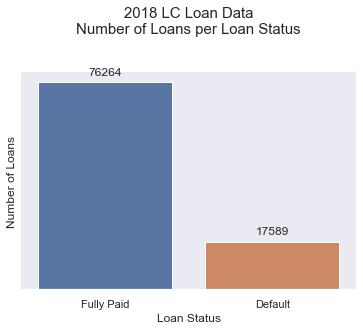

In [3]:
ax = sns.countplot(x='loan_status_flag', data=df)
gp.annotate_plot(ax)
gp.hide_borders(ax, ['top', 'right', 'left'])   # hide top and right borders
ax.get_yaxis().set_ticks([])
ax.get_yaxis().set_ticklabels([])
plt.ylabel('Number of Loans')
_ = plt.xlabel('Loan Status')
_ = plt.title('2018 LC Loan Data\nNumber of Loans per Loan Status\n\n', size=15)

## Time Series Analysis

In [4]:
# group data frame by loan's issued month and status
df_loans = df.groupby(['issue_d_month','loan_status_flag'])[['issue_d_month']].count().unstack()['issue_d_month']
df_loans.columns = df_loans.columns.add_categories(['Total Loans'])
df_loans['Total Loans'] = df_loans.sum(axis=1)

# compute monthly loan percentage
for status in gv.LOAN_STATUS_FLAG:
    status_pct = status + ' %'
    df_loans.columns = df_loans.columns.add_categories([status_pct])
    df_loans[status_pct] = round(df_loans[status] * 100 / df_loans['Total Loans'], 2)

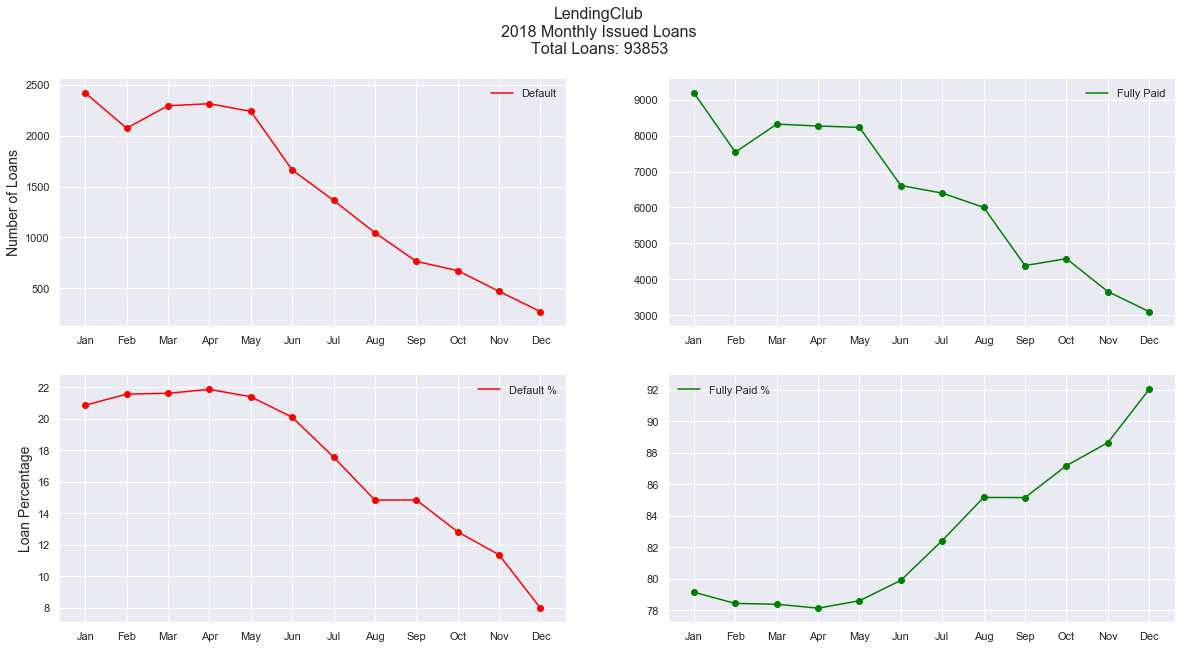

In [5]:
# plot monthly issued loans
gp.plot_timeseries(df_loans[['Fully Paid %', 'Default %', 'Fully Paid', 'Default']],
                'LendingClub\n2018 Monthly Issued Loans\nTotal Loans: ' + str(df.shape[0]))

**Number of Loans**

 - There is a downward trend on the number of loans for both default and fully paid loans. 
 - Looking at the total number of loans as a whole, the number of borrowers are high at the begining of the year and are decreasing toward the end of the year.

**Loan Percentage**

 - The default percentage is high at the begining of the year and is decreasing toward the end of the year. This indicates that the borrowers are more likely to default on the loan during the first 5 months of the year.
    
 - The fully paid percentage is low at the begining of the year and is increasing toward the end of the year. This indicates that the borrowers are more likely to pay off the loan during the last 6 months of the year.

## Frequency Distribution

In [6]:
def compute_pct(df_in, col_name):
    df_temp = df_in.groupby([col_name, 'loan_status_flag'])[[col_name]].count().unstack()[col_name]
    
    for status in gv.LOAN_STATUS_FLAG[:2]:
        status_pct = status + ' %'
        df_temp.columns = df_temp.columns.add_categories([status_pct])
        df_temp[status_pct] = round(df_temp[status] * 100 / df_temp[status].sum(), 0)
    
    return df_temp[gv.LOAN_STATUS_FLAG[2:]]

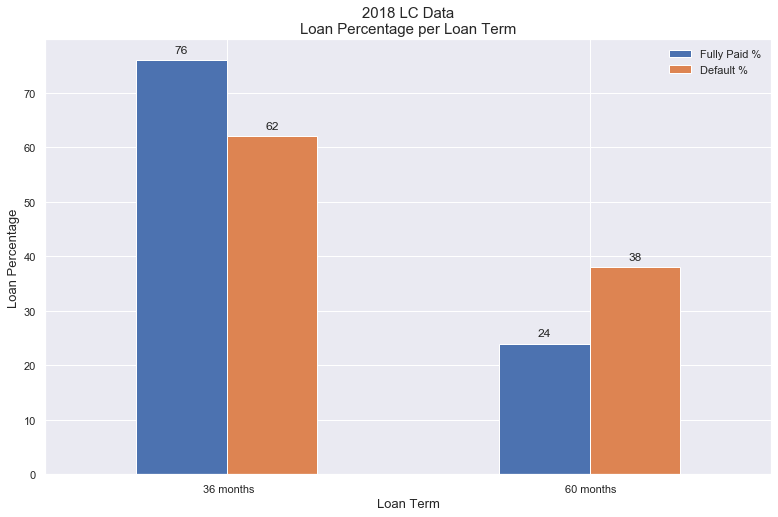

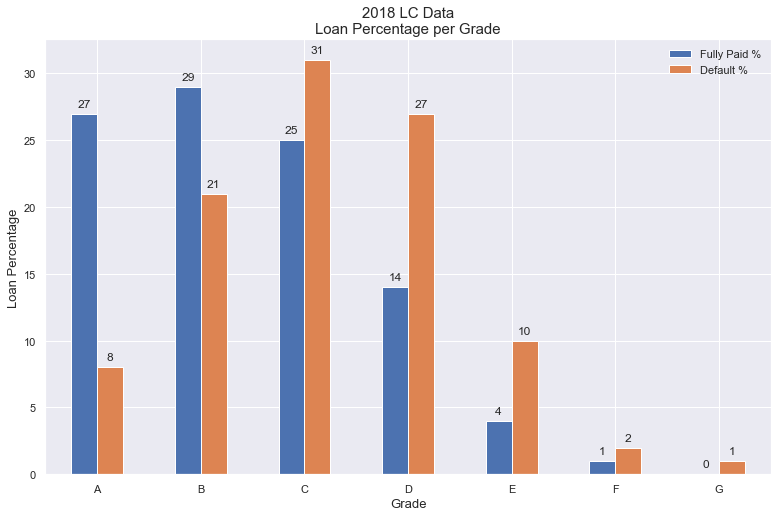

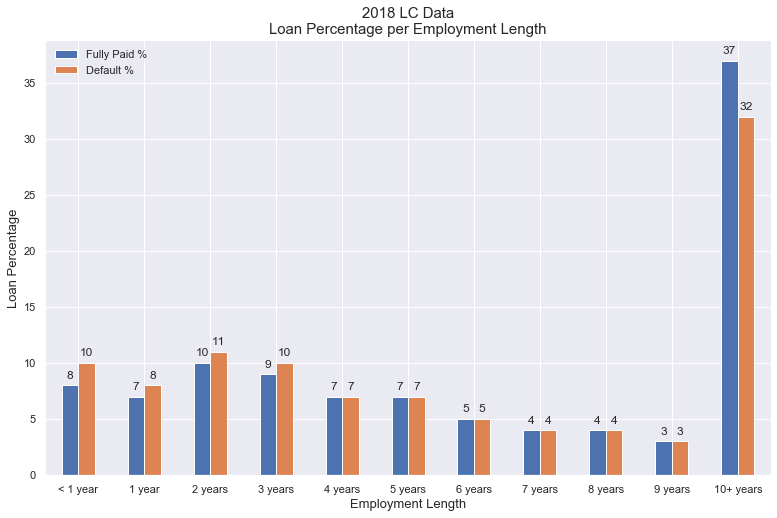

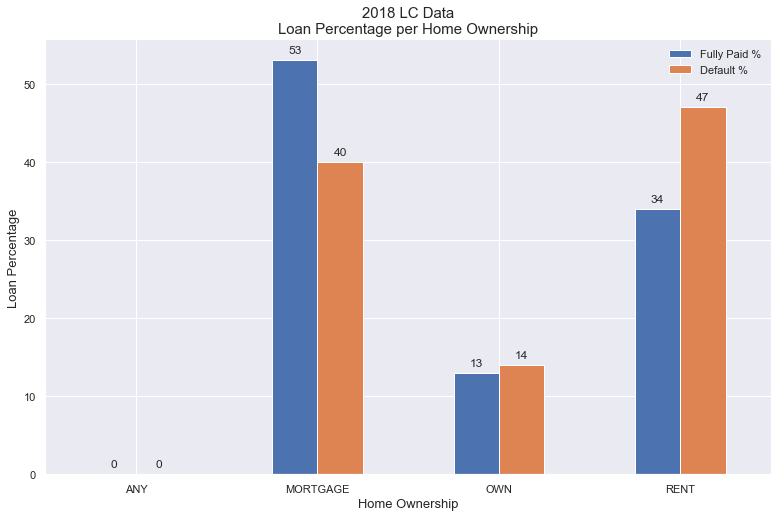

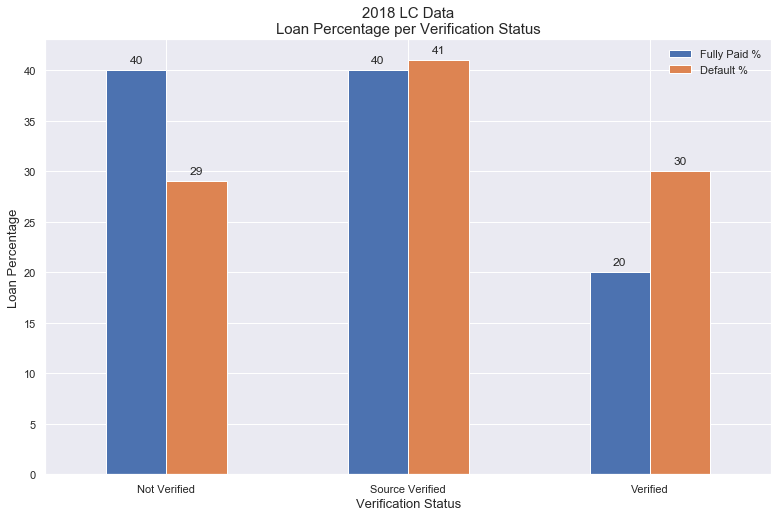

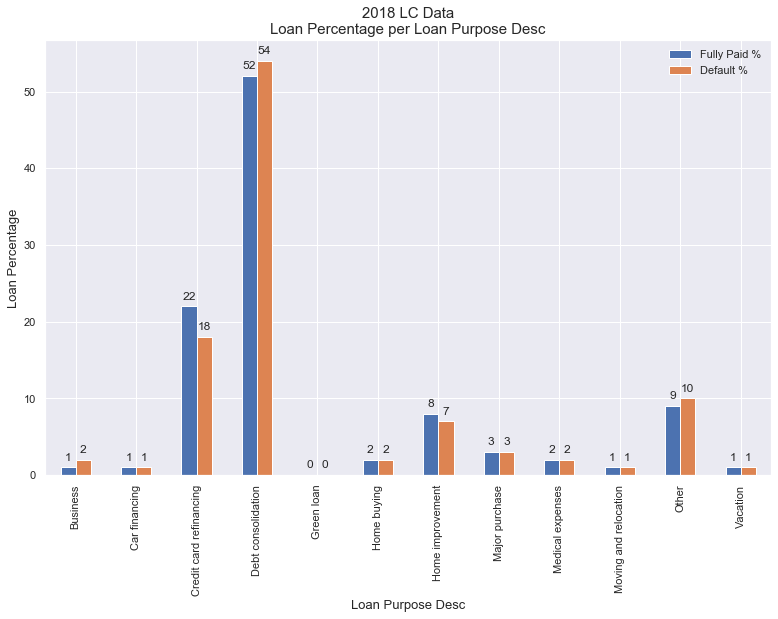

In [7]:
# a list of categorical columns for plotting
cat_cols = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'title']

for col_name in cat_cols:
    fig, ax = plt.subplots(figsize=(13, 8))
    temp = compute_pct(df, col_name)
    temp.plot.bar(ax=ax)
    gp.annotate_plot(ax)
    legend = ax.legend(loc='best', frameon=False)
    plt.title('2018 LC Data\nLoan Percentage per ' + gv.VARS_DESC[col_name], fontsize=15)
    ax.set_ylabel('Loan Percentage', fontsize=13)
    ax.set_xlabel(gv.VARS_DESC[col_name], fontsize=13)
    
    if col_name == 'title':
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)

## Location of Data

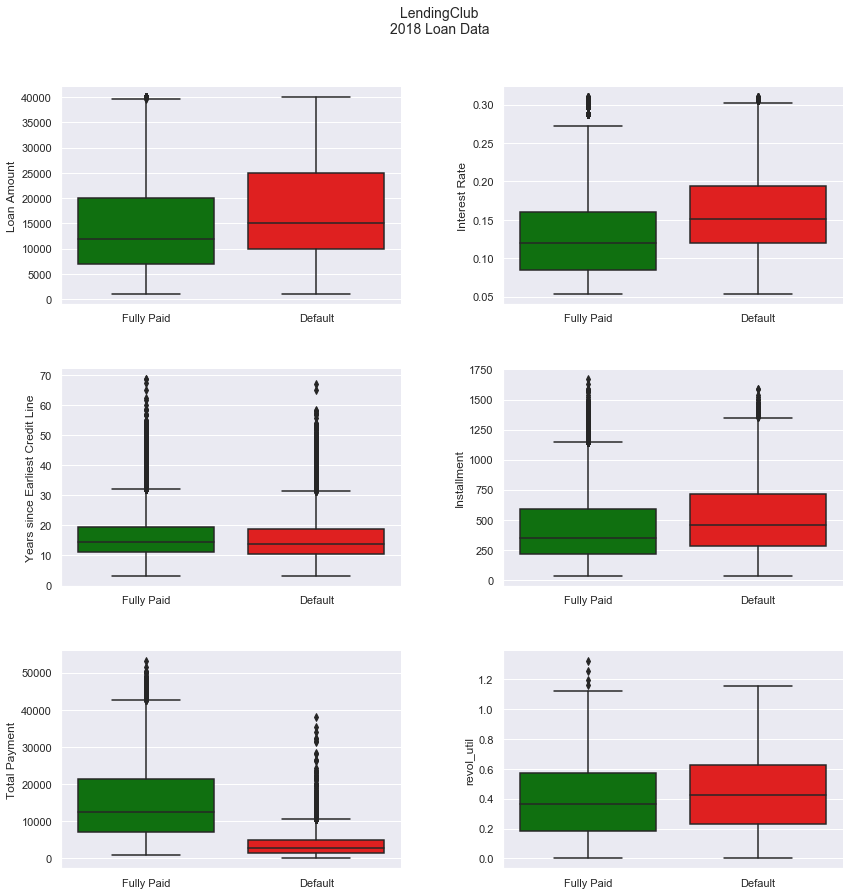

In [8]:
# box plots - location of data
y_cols = ['loan_amnt', 'int_rate', 'yrs_since_earliest_cr_line', 'installment', 'total_pymnt', 
          'revol_util']

cols = 2
rows = int(round(len(y_cols)/cols, 0))
fig, ax = plt.subplots(figsize=(14, 14), nrows=rows, ncols=cols)
y_index = -1
for r in range(rows):
    for c in range(cols):
        y_index += 1
        g = sns.boxplot(x="loan_status_flag", y=y_cols[y_index], data=df, ax=ax[r, c], palette=gv.STATUS_FLAG_COLORS)
        gp.hide_borders(ax[r, c], ['top', 'right'])   # hide top and right borders
        ax[r, c].set_xlabel('')
        ax[r, c].set_ylabel(gv.VARS_DESC.get(y_cols[y_index]))

plt.suptitle('LendingClub\n2018 Loan Data', fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()